In [ ]:
// --------------------------------------------------------------------------------------------------
// #EE569 Homework Assignment #4
// #Date: March 19, 2019
// #Name: Suchismita Sahu
// #ID: 7688176370
// #email: suchisms@usc.edu
// --------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [11]:
def read_raw(filename, length, width):
    input_raw_image = open(filename,'rb').read()
    input_raw_image = np.frombuffer(input_raw_image, np.uint8).copy()
    img = input_raw_image[0 : length*width]
    img = np.reshape(img, (length,width))
    return img

In [5]:
length = 28
width = 28

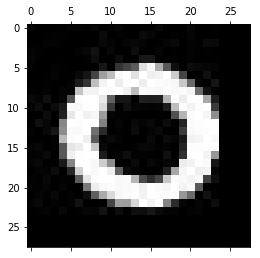

In [12]:
img1_zero = read_raw('zero_1.raw', 28, 28)
plt.matshow(img1_zero, cmap = 'gray')

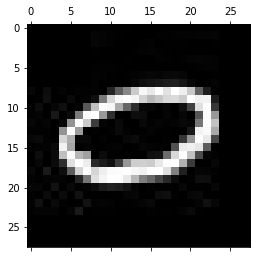

In [13]:
img2_zero = read_raw('zero_2.raw', 28, 28)
plt.matshow(img2_zero, cmap = 'gray')

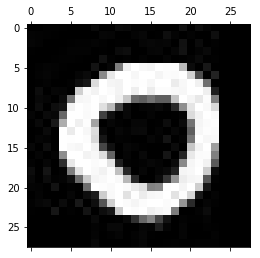

In [14]:
img3_zero = read_raw('zero_3.raw', 28, 28)
plt.matshow(img3_zero, cmap = 'gray')

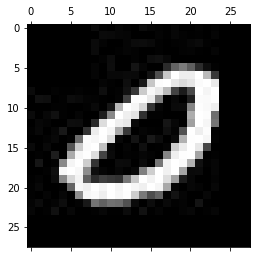

In [15]:
img4_zero = read_raw('zero_4.raw', 28, 28)
plt.matshow(img4_zero, cmap = 'gray')

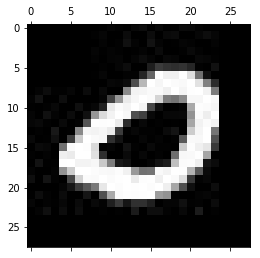

In [16]:
img5_zero = read_raw('zero_5.raw', 28, 28)
plt.matshow(img5_zero, cmap = 'gray')

In [25]:
all_zeros = np.concatenate((img1_zero, img2_zero, img3_zero, img4_zero, img5_zero), axis=0)
all_ones = np.concatenate((img1_one, img2_one, img3_one, img4_one, img5_one), axis=0)
all_images = all_zeros + all_ones

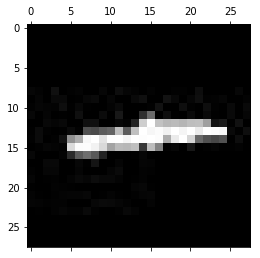

In [19]:
img1_one = read_raw('one_1.raw', 28, 28)
plt.matshow(img1_one, cmap = 'gray')

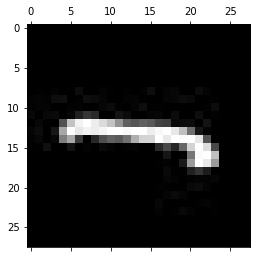

In [20]:
img2_one = read_raw('one_2.raw', 28, 28)
plt.matshow(img2_one, cmap = 'gray')

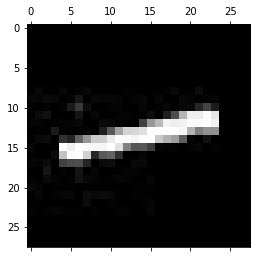

In [21]:
img3_one = read_raw('one_3.raw', 28, 28)
plt.matshow(img3_one, cmap = 'gray')

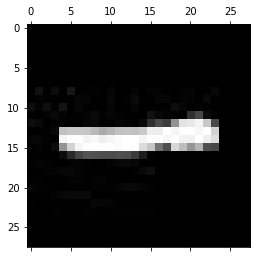

In [22]:
img4_one = read_raw('one_4.raw', 28, 28)
plt.matshow(img4_one, cmap = 'gray')

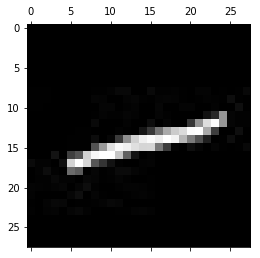

In [23]:
img5_one = read_raw('one_5.raw', 28, 28)
plt.matshow(img5_one, cmap = 'gray')

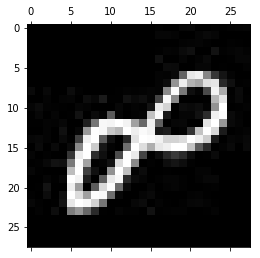

In [24]:
img_eight = read_raw('eight.raw', 28, 28)
plt.matshow(img_eight, cmap = 'gray')

In [27]:
extractor = cv2.xfeatures2d.SIFT_create()

In [28]:
def features(image, extractor):
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [29]:
# Finding Features of each image

kp1,des1 = features(img1_one, extractor)
kp2,des2 = features(img2_one, extractor)
kp3,des3 = features(img3_one, extractor)
kp4,des4 = features(img4_one, extractor)
kp5,des5 = features(img5_one, extractor)
kp6,des6 = features(img1_zero, extractor)
kp7,des7 = features(img2_zero, extractor)
kp8,des8 = features(img3_zero, extractor)
kp9,des9 = features(img4_zero, extractor)
kp10,des10 = features(img5_zero, extractor)

kp11, des11 = features(img_eight, extractor)


In [30]:
descriptor_list = np.concatenate((des1, des2, des3, des4, des6, des7, des8, des9, des10), axis = 0)
descriptor_zeros = np.concatenate((des6, des7, des8, des9, des10), axis = 0)
descriptor_ones = np.concatenate((des1, des2, des3, des4), axis = 0)

In [31]:
descriptor_list = descriptor_list.tolist()
descriptor_zeros = descriptor_zeros.tolist()
descriptor_ones = descriptor_ones.tolist()

In [45]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2).fit(descriptor_list)
train_labels = k_means.labels_
centroids = k_means.cluster_centers_

In [35]:
def build_hist(descriptor_list, k_means):
    hist = np.zeros(len(k_means.cluster_centers_))
    clustering_result = k_means.predict(descriptor_list)
    for i in clustering_result:
        hist[i]+=1.0
    return hist

In [36]:
eight_image = []
for image in all_images:
      keypoint, descriptor = features(image, extractor)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, k_means)
          eight_image.append(histogram)

In [39]:
for i in eight_image:
    plt.bar([1,0], histogram)
plt.show()

In [40]:
zeros = []
for image in all_zeros:
      keypoint, descriptor = features(image, extractor)
      if (descriptor is not None):
          histogram = build_histogram(descriptor_zeros, k_means)
          zeros.append(histogram)

In [41]:
for i in zeros:
    plt.bar([1,0], zeros)
    plt.show()

In [42]:
eight_histogram = build_hist(des11, k_means)

<Container object of 2 artists>

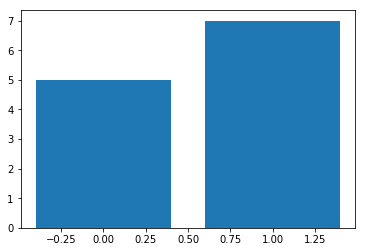

In [43]:
plt.bar([1,0],eight_histogram)

In [44]:
k_means = KMeans(n_clusters=2).fit(descriptor_zeros)
train_labels = k_means.labels_
centroids = k_means.cluster_centers_

In [46]:
zero_histogram = build_hist(descriptor_zeros, k_means)

<Container object of 2 artists>

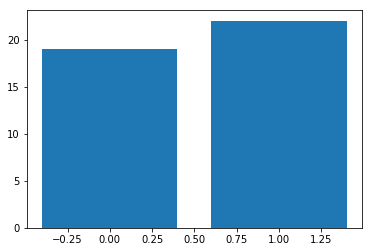

In [48]:
plt.bar([0,1],zero_histogram)

<Container object of 2 artists>

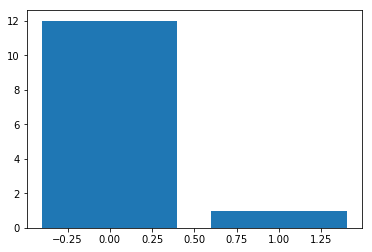

In [50]:
one_histogram = build_hist(descriptor_ones, k_means)
plt.bar([0,1], one_histogram)

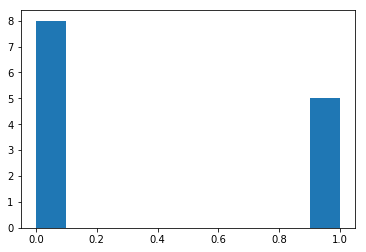

In [52]:
kmeans1 = KMeans(n_clusters = 2)
kmeans1.fit(descriptor_ones)
plt.hist(kmeans1.labels_)
plt.show()

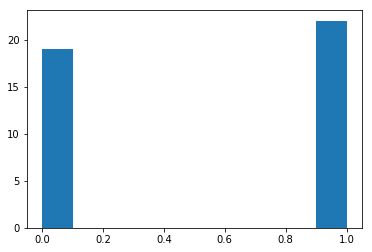

In [53]:
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(descriptor_zeros)
plt.hist(kmeans2.labels_)
plt.show()

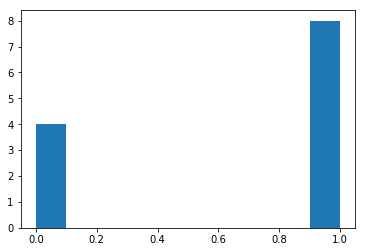

In [60]:
kmeans3 = KMeans(n_clusters = 2)
kmeans3.fit(des11)
plt.hist(kmeans3.labels_)
plt.show()

In [61]:
#Calcuating Intersection:
zero_label_ones =  np.count_nonzero(kmeans2.labels_)
zero_label_zeros = len(kmeans2.labels_) - zero_label_ones

one_label_ones =  np.count_nonzero(kmeans1.labels_)
one_label_zeros = len(kmeans1.labels_) - one_label_ones


In [64]:
eight_label_ones =  np.count_nonzero(kmeans3.labels_)
eight_label_zeros = len(kmeans3.labels_) - eight_label_ones

zero_intersection = eight_label_zeros/zero_label_zeros + eight_label_ones/zero_label_ones
one_intersection = eight_label_zeros/one_label_zeros + one_label_ones/eight_label_ones

In [66]:
print("Intersection with zeros histogram:", zero_intersection)
print("Intersection with ones histogram:", one_intersection)

Intersection with zeros histogram: 2.5
Intersection with ones histogram: 1.125
